# House Price Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

Number of features:

In [3]:
train.shape[1]

81

Training data size:

In [4]:
train.shape[0]

1460

Test data size:

In [5]:
test.shape[0]

1459

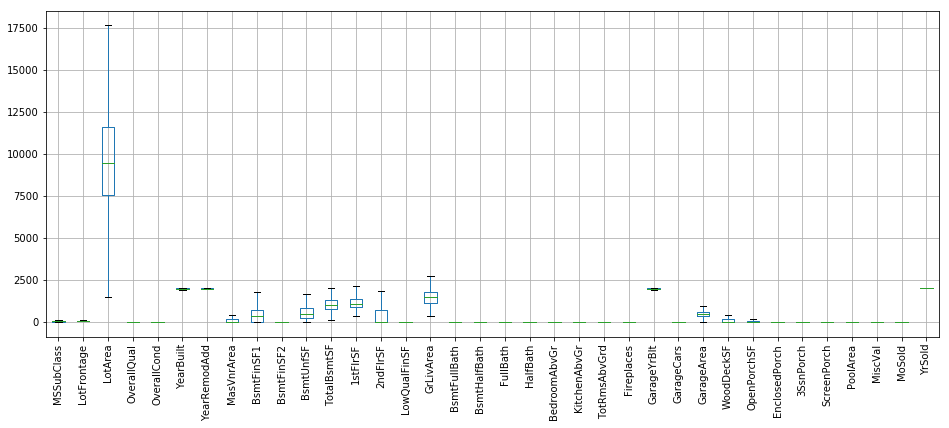

In [6]:
plt.rcParams['figure.figsize'] = (16, 6)
train.iloc[:,1:-1].boxplot(showfliers=False, rot=90)
plt.show()

In [7]:
num_feat = (train.dtypes != "object").as_matrix()

In [8]:
train_num = train.iloc[:, num_feat]

In [9]:
(train_num < 0).any().any()

False

In [10]:
train_num = train_num.fillna(train_num.mean())
train.iloc[:, num_feat] = train_num

In [11]:
test_num = test.iloc[:, num_feat[:-1]]
test_num = test_num.fillna(train_num.mean())
test.iloc[:, num_feat[:-1]] = test_num

In [12]:
(train_num < 0).any().any()

False

In [13]:
train_test = pd.concat([train.iloc[:,:-1], test])

In [14]:
train_test = pd.get_dummies(train_test)

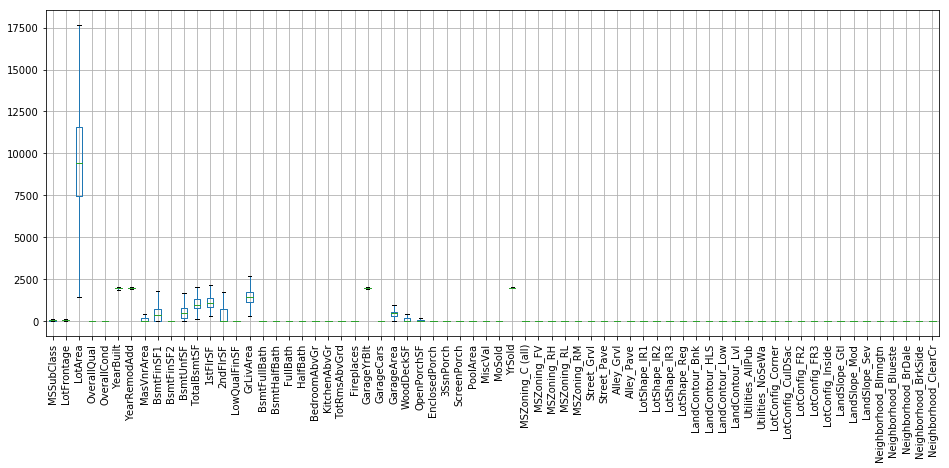

In [15]:
train_test.iloc[:,1:-220].boxplot(showfliers=False, rot=90)
plt.show()

In [16]:
train_test.iloc[:, 1:] = train_test.iloc[:, 1:] / train_test.iloc[:, 1:].max()

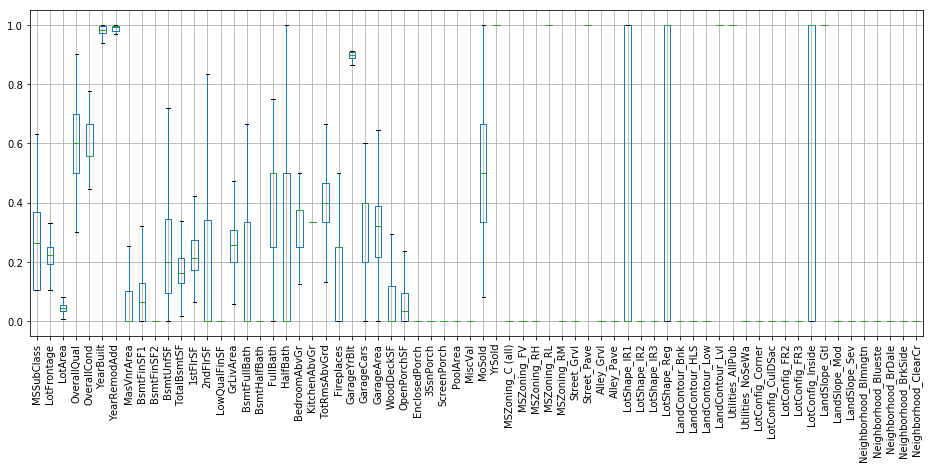

In [17]:
train_test.iloc[:,1:-220].boxplot(showfliers=False, rot=90)
plt.show()

In [18]:
np.sum(train_test["Street_Pave"] == 1) / train_test.shape[0]

0.99588900308324768

In [19]:
np.sum(train_test["Street_Pave"] == 0) / train_test.shape[0]

0.0041109969167523125

In [20]:
train_test.shape[1]

289

In [21]:
X = train_test.iloc[0:train.shape[0], :]
y = train.iloc[:, -1]
kaggle_test = train_test.iloc[train.shape[0]:, :]

In [22]:
X_train, X_test, y_train, y_true = train_test_split(X, y)

In [23]:
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
y_pred = lin_reg.predict(X_test)

In [26]:
mean_squared_error(y_true, y_pred)

1359336755.0070093